# Implementation 4 - Multiple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data inspection

In [5]:
correlation = data.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


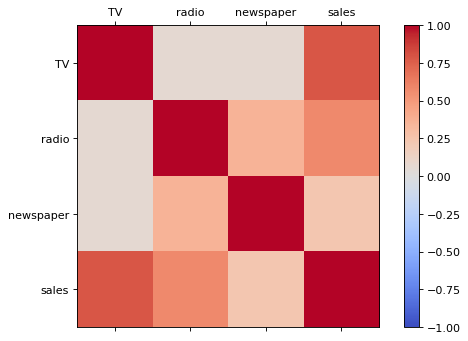

In [6]:
fig = plt.figure(figsize=(8,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = data.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

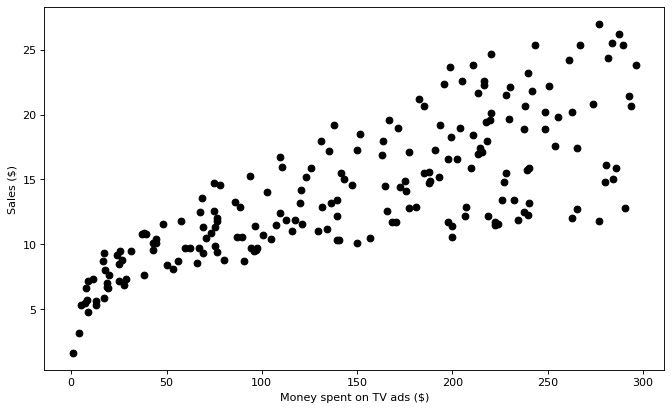

In [7]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

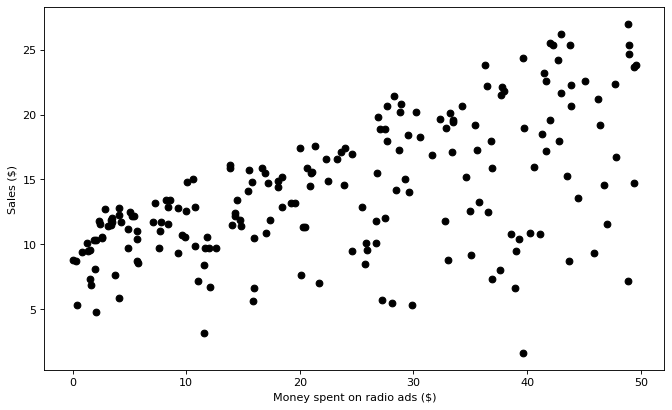

In [8]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['radio'], data['sales'], c='black')
plt.xlabel("Money spent on radio ads ($)")
plt.ylabel("Sales ($)")
plt.show()

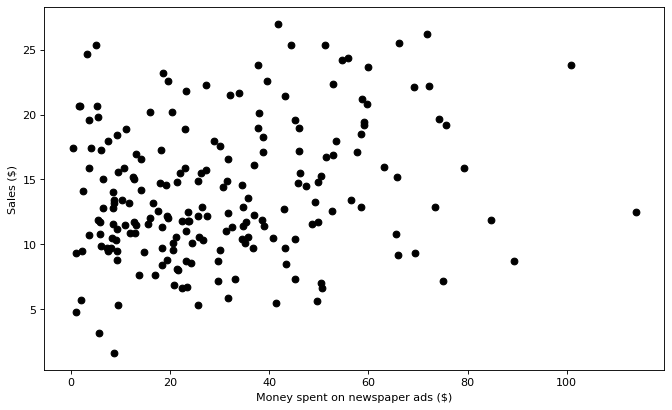

In [9]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['newspaper'], data['sales'], c='black')
plt.xlabel("Money spent on newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

We notice from data inspection that 'sales' seems correlated with 'TV' and 'radio'.<br>
In this section, we will consider several features and the sales as the response.

## Data preparation

In [10]:
X = data.drop('sales', axis=1)
y = data['sales'].values.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Single linear regression (reminder of ML_course03_implem)

### Model fit

In [12]:
from sklearn.linear_model import LinearRegression
reg_single = LinearRegression()
reg_single.fit(X_train['TV'].values.reshape(-1,1), y_train)

LinearRegression()

### Accuracy

In [13]:
y_pred = reg_single.predict(X_test['TV'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 563.28
Mean absolute error (MAE): 2.20
Mean square error (MSE): 8.41
Root mean square error (RMSE): 2.90


## Multiple linear regression

### Model fit

In [14]:
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 2.9038 + 0.044346*TV + 0.19661*radio + 0.0026256*newspaper


### Accuracy

In [15]:
y_pred = reg_multiple.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 226.89
Mean absolute error (MAE): 1.19
Mean square error (MSE): 3.39
Root mean square error (RMSE): 1.84


## Polynomial regression

### Polynomial features based on TV feature only

In [16]:
X_train['TV'].head()

163    163.5
51     100.4
86      76.3
139    184.9
90     134.3
Name: TV, dtype: float64

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train['TV'].values.reshape(-1,1))

X_train_poly = pd.DataFrame(X_train_poly)
X_train_poly.columns = poly.get_feature_names()

In [18]:
X_train_poly[:5]

,x0,x0^2,x0^3,x0^4,x0^5
0,163.5,26732.25,4370722.875,7.146132e+08,1.168393e+11
1,100.4,10080.16,1012048.064,1.016096e+08,1.020161e+10
2,76.3,5821.69,444194.947,3.389207e+07,2.585965e+09
3,184.9,34188.01,6321363.049,1.168820e+09,2.161148e+11
4,134.3,18036.49,2422300.607,3.253150e+08,4.368980e+10


In [19]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

LinearRegression()

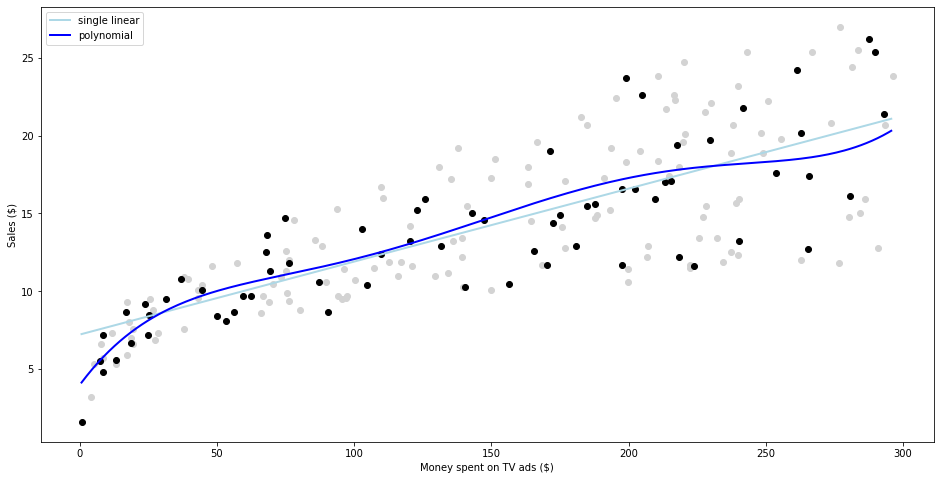

In [20]:
X_plot = np.arange(min(data['TV']),max(data['TV']),1)
X_plot = X_plot.reshape(-1, 1)
X_poly_plot = poly.transform(X_plot)
y_poly_plot = reg_poly.predict(X_poly_plot)
y_single_plot = reg_single.predict(X_plot)

plt.figure(figsize=(16, 8))
plt.scatter(X_train['TV'], y_train, c='lightgray')
plt.scatter(X_test['TV'], y_test, c='black')
plt.plot(X_plot, y_single_plot, c='lightblue', linewidth=2, label='single linear')
plt.plot(X_plot, y_poly_plot, c='blue', linewidth=2, label='polynomial')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

#### Accuracy

In [21]:
y_pred = reg_poly.predict(poly.transform(X_test['TV'].values.reshape(-1, 1)))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 551.62
Mean absolute error (MAE): 2.21
Mean square error (MSE): 8.23
Root mean square error (RMSE): 2.87


### With interaction terms

In [22]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_interaction = interaction.fit_transform(X_train)

X_train_interaction = pd.DataFrame(X_train_interaction)
X_train_interaction.columns = interaction.get_feature_names()

In [23]:
X_train_interaction.head()

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,163.5,36.8,7.4,26732.25,6016.80,1209.90,1354.24,272.32,54.76
1,100.4,9.6,3.6,10080.16,963.84,361.44,92.16,34.56,12.96
2,76.3,27.5,16.0,5821.69,2098.25,1220.80,756.25,440.00,256.00
3,184.9,43.9,1.7,34188.01,8117.11,314.33,1927.21,74.63,2.89
4,134.3,4.9,9.3,18036.49,658.07,1248.99,24.01,45.57,86.49


In [24]:
reg_interaction = LinearRegression()
reg_interaction.fit(X_train_interaction, y_train)

LinearRegression()

#### Accuracy

In [25]:
# y_pred = clf.predict(X_test)
y_pred = reg_interaction.predict(interaction.transform(X_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 47.92
Mean absolute error (MAE): 0.53
Mean square error (MSE): 0.72
Root mean square error (RMSE): 0.85
